In [35]:
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score


In [36]:
data = pd.read_csv("./Dataset/real_estate_dataset.csv")

In [37]:
data.drop("ID", axis=1, inplace=True)
data.head()

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [38]:
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
print("x_train: ", x_train)
print("x_test: ",x_test)
print("y_train: ",y_train)
print("y_test: ",y_test)


x_train:       Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
107   238.887785             5              3           3        1980   
336   263.865146             4              3           1        1991   
71     99.678920             4              1           2        1935   
474   181.925277             3              1           3        1995   
6      64.520903             4              3           1        1938   
..           ...           ...            ...         ...         ...   
323   119.983474             5              3           2        1951   
192   275.104514             2              3           3        1954   
117    96.642515             4              2           3        1935   
47    180.017005             5              2           1        1966   
172   178.023265             3              3           1        1996   

     Has_Garden  Has_Pool  Garage_Size  Location_Score  Distance_to_Center  
107           1         1           

In [39]:
print(f"Rows: {data.shape[0]}\nColumns: {data.shape[1]}")

Rows: 500
Columns: 11


array([[<Axes: title={'center': 'Square_Feet'}>,
        <Axes: title={'center': 'Num_Bedrooms'}>,
        <Axes: title={'center': 'Num_Bathrooms'}>],
       [<Axes: title={'center': 'Num_Floors'}>,
        <Axes: title={'center': 'Year_Built'}>,
        <Axes: title={'center': 'Has_Garden'}>],
       [<Axes: title={'center': 'Has_Pool'}>,
        <Axes: title={'center': 'Garage_Size'}>,
        <Axes: title={'center': 'Location_Score'}>],
       [<Axes: title={'center': 'Distance_to_Center'}>,
        <Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

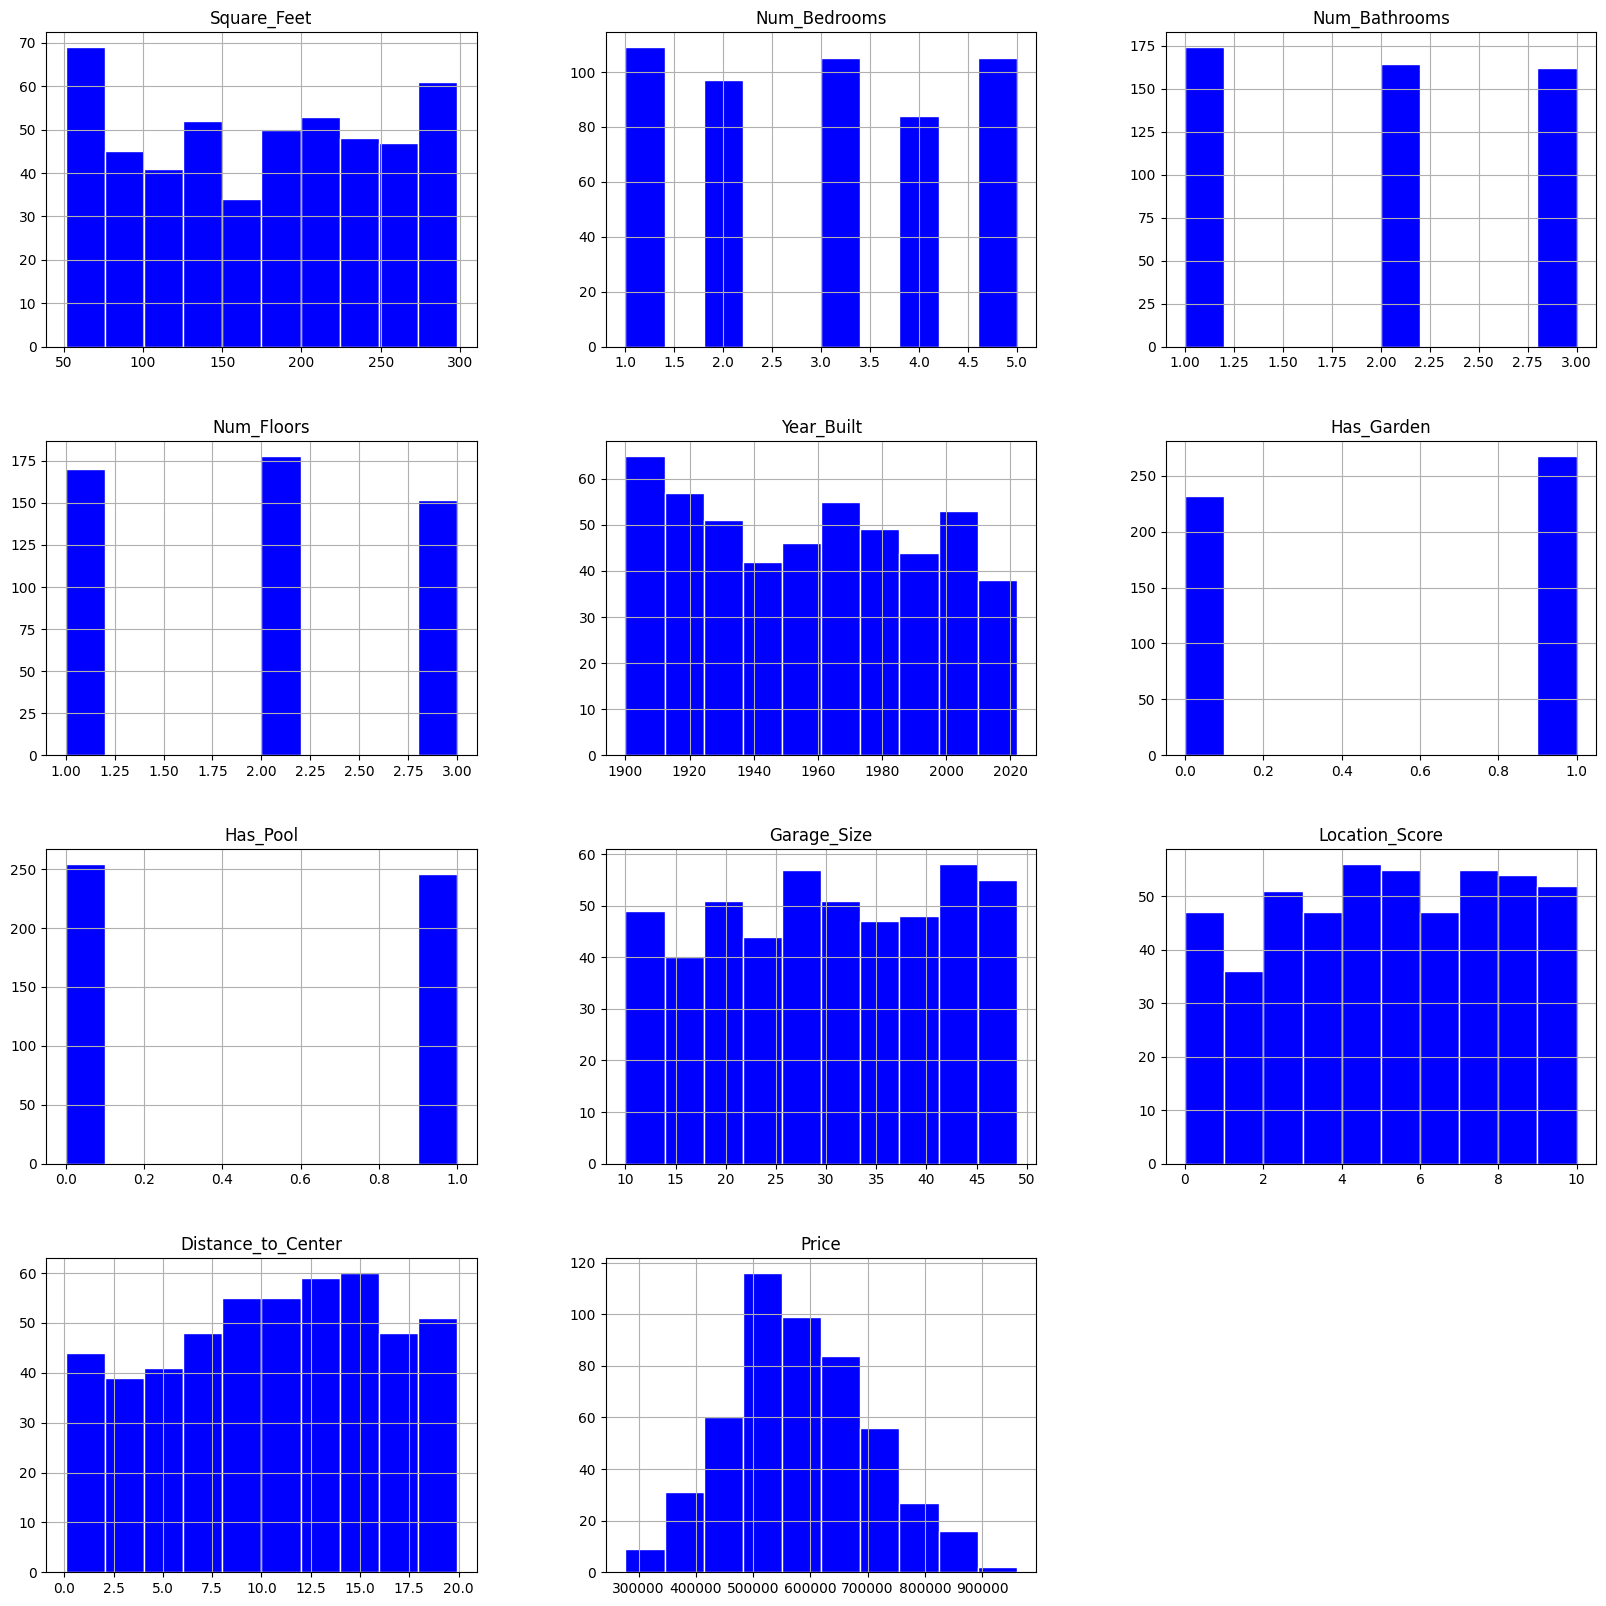

In [40]:
data.hist(figsize=(20,20), color = 'blue', edgecolor = 'white')

In [41]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(x_train, y_train)
LR_pred = LinearRegression_model.predict(x_test)
Accuracy_LR = r2_score(y_test, LR_pred)

In [42]:
RandomForest_model = RandomForestRegressor(
    n_estimators=1000,          # Tăng số lượng cây trong rừng
    random_state=420,           # Để kết quả có thể tái lập
    max_depth=20,               # Tăng độ sâu tối đa
    min_samples_split=2,        # Giảm số lượng mẫu tối thiểu để tách một node
    min_samples_leaf=1,         # Giảm số lượng mẫu tối thiểu ở một node lá
    max_features='sqrt',        # Số lượng đặc trưng được xem xét khi tìm kiếm split tốt nhất
    max_leaf_nodes=None,        # Không giới hạn số lượng node lá
    bootstrap=True,             # Sử dụng bootstrap samples
    oob_score=False,            # Không tính toán điểm out-of-bag
    max_samples=None            # Sử dụng toàn bộ dữ liệu
)
RandomForest_model.fit(x_train,y_train)
RF_pred = RandomForest_model.predict(x_test)
Accuracy_RF = r2_score(y_test, RF_pred)

In [43]:
DecisonTree_model = DecisionTreeRegressor()
DecisonTree_model.fit(x_train, y_train)
DT_pred = DecisonTree_model.predict(x_test)
Accuracy_DT = r2_score(y_test, DT_pred)

In [44]:
print(f"Accuracy of Linear Regression is {Accuracy_LR}, Accuracy of Random Forest is {Accuracy_RF}, Accuracy of Decision Tree is {Accuracy_DT}")

Accuracy of Linear Regression is 0.9799017626216131, Accuracy of Random Forest is 0.8506497385672536, Accuracy of Decision Tree is 0.7056569712337997


In [45]:
best_model = LinearRegression_model
if Accuracy_DT > Accuracy_LR and Accuracy_DT > Accuracy_RF:
    best_model = DecisonTree_model
elif Accuracy_DT < Accuracy_RF and Accuracy_LR < Accuracy_RF:
    best_model = RandomForest_model
joblib.dump(best_model, "Best_Model.pkl")
print(best_model)

LinearRegression()
